# Car Price Prediction - Data Preparation

### Created, analyzed and learnt with love by Krystian Rozwag

First, we're going to import the most important libraries to analyze and prepare data. Because of big size of data, unprepared csv file is under this link: https://drive.google.com/file/d/1ffeJYHd4MOV7vnAgZ1gUz6AR68szmW4p/view?usp=sharing

## 1. Data loading and checking the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

Secondly, we will load the data and check first 5 rows

In [2]:
car = pd.read_csv("car_data.csv")
car.head()

,Unnamed: 0,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


We've got a really big dataset (1 723 065 rows!)

In [3]:
car.shape

(1723065, 25)

Most of our columns are "objects" and there are a lot of columns, that we do not need in our dataset

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 25 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   city          object 
 2   price         int64  
 3   year          float64
 4   manufacturer  object 
 5   make          object 
 6   condition     object 
 7   cylinders     object 
 8   fuel          object 
 9   odometer      float64
 10  title_status  object 
 11  transmission  object 
 12  vin           object 
 13  drive         object 
 14  size          object 
 15  type          object 
 16  paint_color   object 
 17  lat           float64
 18  long          float64
 19  county_fips   float64
 20  county_name   object 
 21  state_fips    float64
 22  state_code    object 
 23  state_name    object 
 24  weather       float64
dtypes: float64(7), int64(2), object(16)
memory usage: 328.6+ MB


In [5]:
car.columns

Index(['Unnamed: 0', 'city', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'lat',
       'long', 'county_fips', 'county_name', 'state_fips', 'state_code',
       'state_name', 'weather'],
      dtype='object')

There are a lot of NaN values we will need to handle

In [6]:
car.isna().sum()

Unnamed: 0            0
city                  0
price                 0
year               6315
manufacturer     136414
make              69699
condition        700790
cylinders        691291
fuel              10367
odometer         564054
title_status       2554
transmission       9022
vin             1118215
drive            661884
size            1123967
type             702931
paint_color      695650
lat                   0
long                  0
county_fips       58833
county_name       58833
state_fips        58833
state_code        58833
state_name            0
weather           59428
dtype: int64

We are going to remove unnecessary like state_X, lat, long, weather etc., that normally shouldn't influence on car price. We will create a smaller subset named "df".

In [7]:
features = ['price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color']

In [8]:
df = car[features]

Exploring and editing "manufacturer" column, because we have a lot of double values like 'vw' and 'volkswagen'.

In [9]:
manufacturers_set = set(df['manufacturer'])
manufacturers_list = list(manufacturers_set)
manufacturers_list = [x for x in manufacturers_list if str(x) != 'nan']
print(manufacturers_list)
car_names_replacement = {'aston':'aston-martin',
                         'alfa':'alfa-romeo',
                         'chevy':'chevrolet',
                         'chev':'chevrolet',
                         'harley':'harley-davidson',
                         'landrover':'land rover',
                         'mercedes':'mercedes-benz',
                         'mercedesbenz':'mercedes-benz',
                         'porche':'porsche',
                         'vw':'volkswagen'}
for key, value in car_names_replacement.items():
    df['manufacturer'] = df['manufacturer'].replace(key,value)

['bmw', 'nissan', 'mercury', 'datsun', 'infinity', 'chevrolet', 'hyundai', 'ford', 'noble', 'harley', 'porche', 'audi', 'toyota', 'subaru', 'land rover', 'dodge', 'fiat', 'mini', 'acura', 'honda', 'pontiac', 'mercedesbenz', 'aston-martin', 'chevy', 'alfa', 'cadillac', 'saturn', 'mitsubishi', 'hennessey', 'aston', 'morgan', 'alfa-romeo', 'landrover', 'harley-davidson', 'mercedes-benz', 'buick', 'chrysler', 'gmc', 'volkswagen', 'lexus', 'ferrari', 'volvo', 'jeep', 'chev', 'mercedes', 'lincoln', 'kia', 'jaguar', 'mazda', 'infiniti', 'ram', 'rover', 'vw']


We have a lot of NaN values in "paint_color" column (695650), so we won't delete them, but create a list with them and replace NaN values randomly with colors

In [10]:
colors_set = set(df['paint_color'])
colors_list = list(colors_set)
colors_list = [x for x in colors_list if str(x) != 'nan']

df['paint_color'] = df['paint_color'].replace(np.nan,random.choice(colors_list))

A lot of outliers in "year" column, co I'm going to remove them and check only cars between 1980-201X

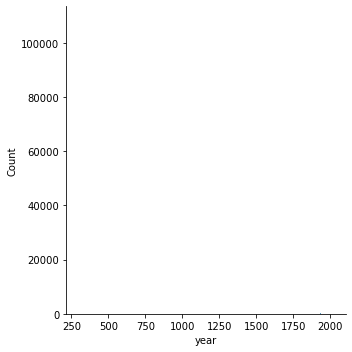

In [11]:
sns.displot(df['year'])

In [12]:
df = df.query('1980 <= year <= 2020')

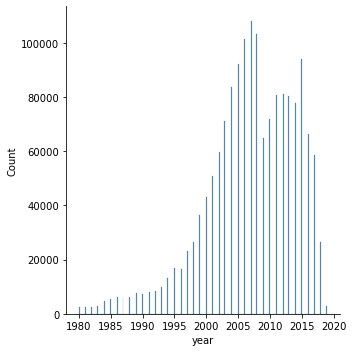

In [13]:
sns.displot(df['year'])

Created a function to fill NaN values randomly in columns where dropping might be too dangerous and we can lose important informations

In [14]:
def random_filling(sub,nlargest=1000):
    df[sub].fillna(random.choice(
            df[sub]
            .value_counts()
            .nlargest(nlargest)
            .index.tolist()
        ),inplace=True)
    
random_filling_dict = {
    'year':1000,
    'odometer':200,
    'size':1000,
    'transmission':1000,
    'fuel':1000,
    'drive':1000,
    'type':5,
}
df.loc[df['title_status'] == np.nan] = 'clean'
df = df[df['title_status'] == 'clean']
for key,value in random_filling_dict.items():
    random_filling(key,value)

In [15]:
df.isna().sum()

price                0
year                 0
manufacturer    107854
make             54234
condition       621117
cylinders       610287
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size                 0
type                 0
paint_color          0
dtype: int64

In [16]:
##sprawdzic fuel bo elektryk np rok wyzszy powinien miec oraz dużo other itd

In title_status column we some categories to delete like parts_only or missing, because we're not going to predict prices on 5066 cars which are in parts.

With condition column we are going to based on a year of production:<br>
a) new = >2018<br>
b) like new = <2015;2018)<br>
c) excellent = <2010;2015)<br>
d) good = <2005;2010)<br>
e) fair = <1990;2005)<br>
f) salvage = <1980;1990)<br>

In [17]:
df.loc[(df['year'] >= 2018)& (df['odometer']<500)  , 'condition'] = "new" 
df.loc[(df['year'] >= 2015) & (df['year'] < 2018), 'condition'] = "like new"
df.loc[(df['year'] >= 2010) & (df['year'] < 2015), 'condition'] = "excellent"
df.loc[(df['year'] >= 2005) & (df['year'] < 2010), 'condition'] = "good"
df.loc[(df['year'] >= 1990) & (df['year'] < 2005), 'condition'] = "fair"
df.loc[(df['year'] < 1990) | (df['odometer']>1000000), 'condition'] = "salvage"



df.loc[(df['year'] >= 2018)| (df['odometer']<500)&(df['condition']==np.nan) , 'condition'] = "new" 
df.loc[(df['year'] >= 2015) & (df['year'] < 2018)&(df['condition']==np.nan) , 'condition'] = "like new"
df.loc[(df['year'] >= 2010) & (df['year'] < 2015)&(df['condition']==np.nan) , 'condition'] = "excellent"
df.loc[(df['year'] >= 2005) & (df['year'] < 2010)&(df['condition']==np.nan) , 'condition'] = "good"
df.loc[(df['year'] >= 1990) & (df['year'] < 2005)&(df['condition']==np.nan) , 'condition'] = "fair"
df.loc[(df['year'] < 1990) | (df['odometer']>100000)&(df['condition']==np.nan) , 'condition'] = "salvage"

Created a small lists with car sizes and based on cylinders we will change "type"=="other" to random size. Again - not to lose anything important



In [18]:
cylinders_dict = {'3 cylinders':3.0, 
                  '4 cylinders':4.0, 
                  '5 cylinders':5.0,
                  '6 cylinders':6.0, 
                  '8 cylinders':8.0,
                  '10 cylinders':10.0,
                  '12 cylinders':12.0}

# def convert_number(x, item_dict):
#     return x.map(item_dict)

# df['cylinders'] = df[['cylinders']].apply(lambda x: convert_number(x, cylinders_dict))

df['cylinders'] = df['cylinders'].map(cylinders_dict)

In [19]:

big_sized_cars = ['truck','bus']
mid_sized_cars = ['SUV','sedan','pickup','wagon','mini-van','van','hatchback']
small_sized_cars = ['offroad','convertible','coupe']

df.loc[(df['type'] == 'other') & ((df['cylinders'] == 12) | (df['cylinders'] == 10)), 'type'] = random.choice(big_sized_cars)
df.loc[(df['type'] == 'other') & ((df['cylinders'] == 8) | (df['cylinders'] == 6)), 'type'] = random.choice(mid_sized_cars)
df.loc[(df['type'] == 'other') & ((df['cylinders'] == 4) | (df['cylinders'] == 5)| (df['cylinders'] == 3)), 'type'] = random.choice(small_sized_cars)


In [20]:
df['cylinders'].value_counts()
df['cylinders'].replace(np.nan, 0, inplace=True)
df.loc[((df['cylinders'] == 'other') & (df['type'].isin(big_sized_cars))) | ((df['cylinders'] == 0) & (df['type'].isin(big_sized_cars))), 'cylinders'] = random.choice([12,10])
df.loc[((df['cylinders'] == 'other') & (df['type'].isin(mid_sized_cars))) | ((df['cylinders'] == 0) & (df['type'].isin(mid_sized_cars))), 'cylinders'] = random.choice([8,6])
df.loc[((df['cylinders'] == 'other') & (df['type'].isin(small_sized_cars)) )| ((df['cylinders'] == 0) & (df['type'].isin(small_sized_cars))), 'cylinders'] = random.choice([5,4,3])


Last clearing like removing rows where we don't have condition = new, deleting NaN from make and manufacturer columns. Also replacing any special characters with empty string and dropping those values

In [21]:
df = df[df['type'] != 'other']
df = df[(df['odometer'] != 0) & (df['condition'] != 'new')]
df = df[df['cylinders'] != 'other']
df = df[df['transmission'] != 'other']
df['cylinders'].value_counts()

df.dropna(subset=['make','manufacturer'],axis=0,inplace=True)


not_make = '/.,;=+<>][\]'
df['make'] = df['make'].str.replace('[^A-Za-z0-9 ]+', '')
df = df[df['make'] != '']

In [22]:
df['cylinders'].value_counts(dropna=False)

8.0     733596
6.0     294416
4.0     243743
12.0     17060
5.0       7876
10.0      3882
3.0        875
Name: cylinders, dtype: int64

In [23]:
df.head(20)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,11900,2010.0,dodge,challenger se,excellent,6.0,gas,43600.0,clean,automatic,rwd,mid-size,coupe,red
2,17550,2008.0,ford,f150,good,8.0,gas,50000.0,clean,automatic,rwd,mid-size,pickup,orange
3,2800,2004.0,ford,taurus,fair,6.0,gas,168591.0,clean,automatic,fwd,full-size,sedan,grey
5,9900,2007.0,gmc,yukon,good,8.0,gas,169000.0,clean,automatic,4wd,mid-size,pickup,orange
9,12995,2003.0,ford,excursion,fair,10.0,gas,236000.0,clean,automatic,4wd,mid-size,SUV,blue
10,4000,2006.0,chevrolet,express 2500 van,good,6.0,gas,138000.0,clean,automatic,rwd,full-size,van,white
11,13000,2002.0,chevrolet,2500 hd,fair,8.0,diesel,350000.0,clean,automatic,4wd,full-size,truck,white
13,18000,2011.0,chevrolet,camaro,excellent,6.0,gas,50000.0,clean,manual,rwd,full-size,coupe,green
14,29000,2016.0,hyundai,santa fe xl,like new,6.0,gas,31500.0,clean,automatic,4wd,mid-size,SUV,black
15,4500,2010.0,chevrolet,cobolt,excellent,4.0,gas,103456.0,clean,automatic,fwd,compact,sedan,black


###### Now, we're going to encode categorical values to numerical

In [24]:
df['drive'].value_counts()

rwd    627634
4wd    370029
fwd    303785
Name: drive, dtype: int64

In [25]:
# drive_dict = {'rwd':0,'4wd':1,'fwd':2}
# size_dict = {'compact': 0 }
# df['drive'] = df['drive'].map(drive_dict)
# df['title_status'] = df['title_status'].map({'clean':0})

In [51]:
df.columns

Index(['price', 'year', 'manufacturer', 'make', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'manufacturer_code', 'size_code', 'type_code',
       'drive_code', 'transmission_code', 'paint_color_code', 'fuel_code',
       'condition_code'],
      dtype='object')

We will use LabelEncoder and encode some of the categorical values to numerical values.

In [60]:
from sklearn.preprocessing import LabelEncoder
encoding_list = ['manufacturer','size','type','drive','transmission','paint_color','fuel','condition','make']
df['title_status_code'] = df['title_status'].map({"clean":1})
lb = LabelEncoder()
for i in encoding_list:
    df[i + "_code"] = lb.fit_transform(df[i])

In [61]:
df['make'].nunique()

45983

In [63]:
df.shape

(1190865, 24)

## Removing outliers

We can see that, we've got a big amount of outliers in price column

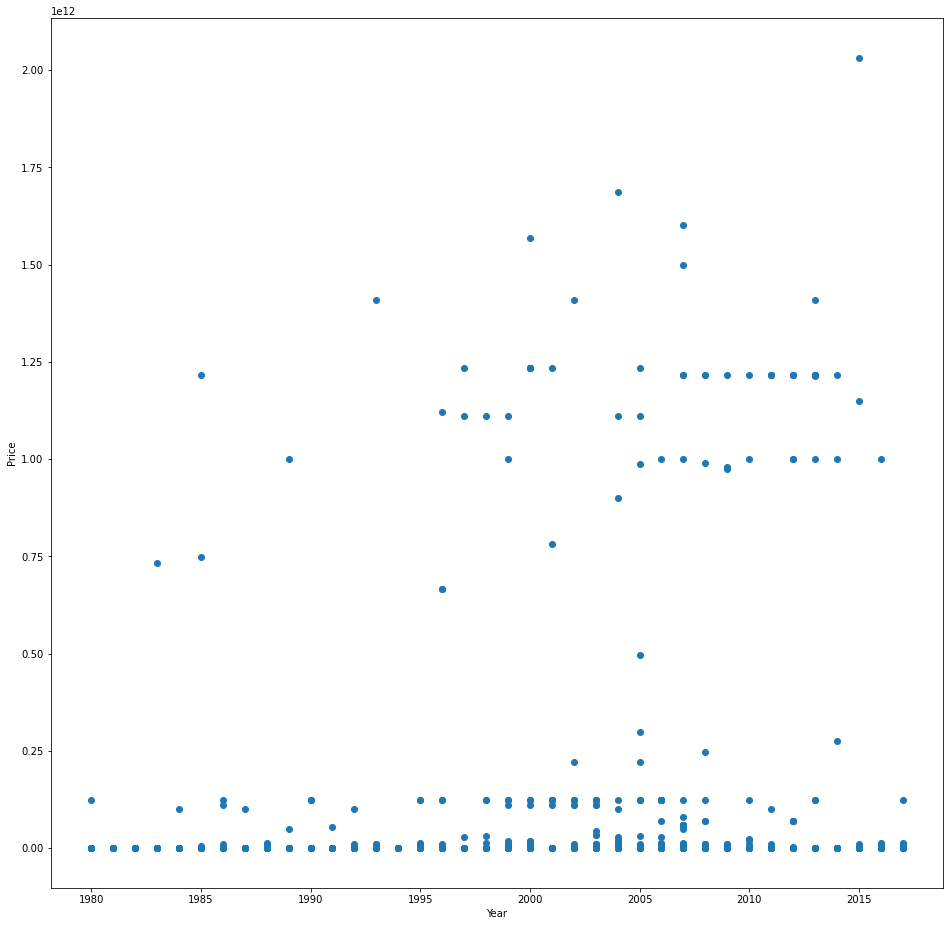

In [30]:
fig, ax = plt.subplots(figsize=(16,16))
ax.scatter(df['year'], df['price']*1000)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

We will use quantiles to remove upper and lower outliers

In [31]:
Q1=df['price'].quantile(0.05)
Q3=df['price'].quantile(0.65)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower = Q1-(1.5*IQR)
Upper = Q3+(1.5*IQR)
print(Lower, Upper)
df = df[(df['price']> Lower)&(df['price']< Upper)]
df.shape

1000.0
10997.0
9997.0
-13995.5 25992.5


(1190865, 22)

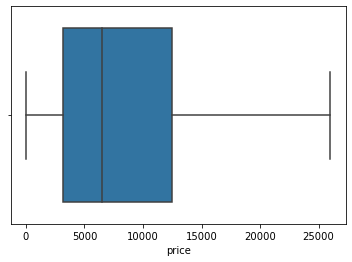

In [32]:
sns.boxplot(data=df,x=df['price'])


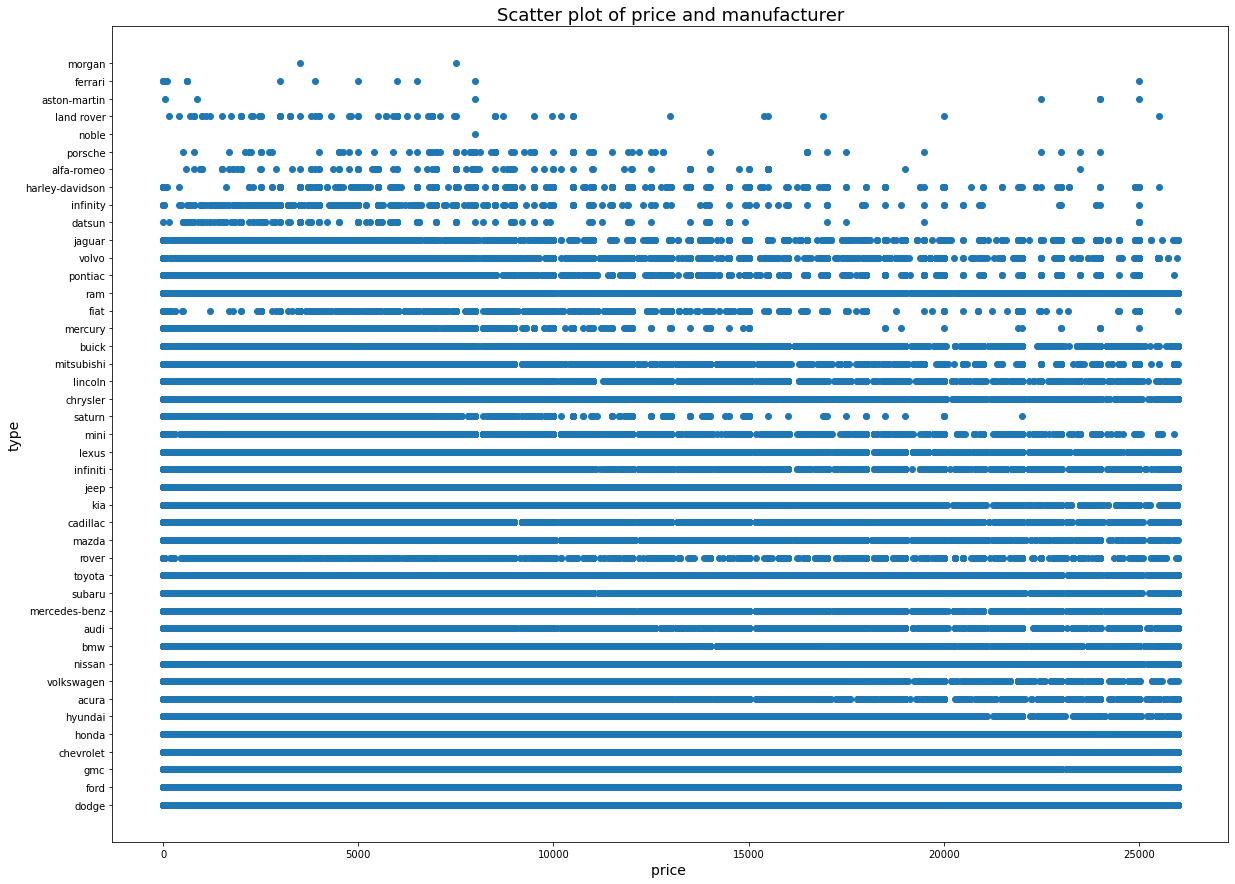

In [33]:
plt.figure(figsize=(20, 15))
plt.scatter(df.price, df['manufacturer'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("type", fontsize=14)
plt.title("Scatter plot of price and manufacturer",fontsize=18)
plt.show()

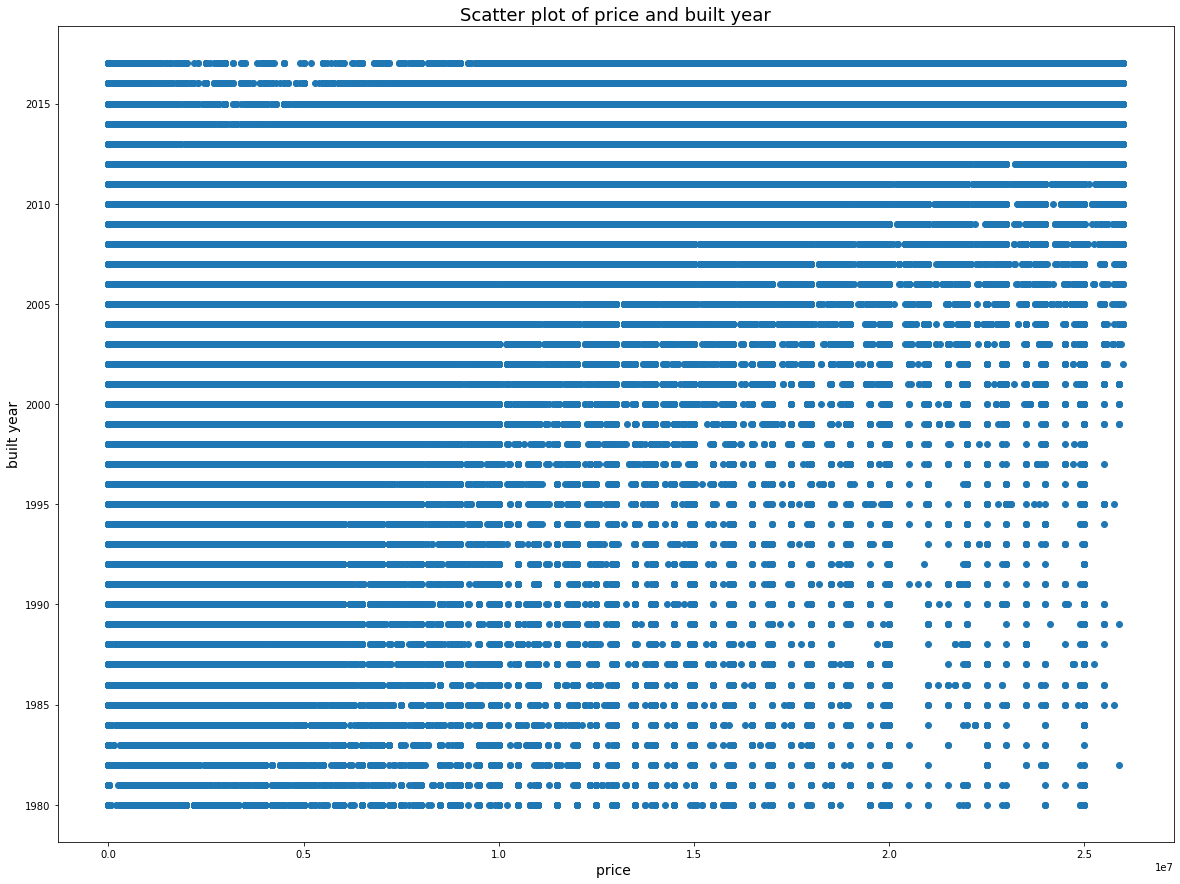

In [34]:
# here we set the figure size to 20x15
plt.figure(figsize=(20, 15))
# plot two values price per built year
plt.scatter(df['price']*1000, df['year'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("built year", fontsize=14)
plt.title("Scatter plot of price and built year",fontsize=18)
plt.show()

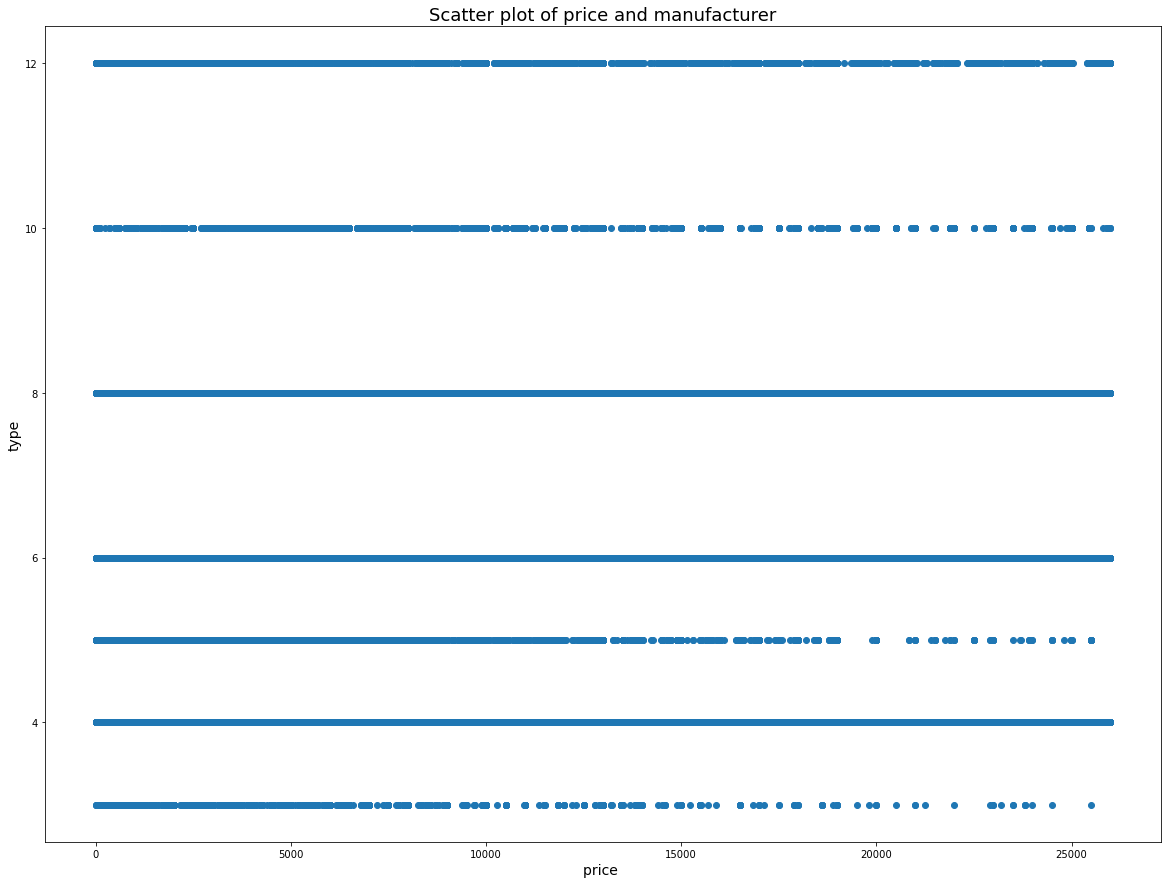

In [35]:
plt.figure(figsize=(20, 15))
plt.scatter(df.price, df['cylinders'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("type", fontsize=14)
plt.title("Scatter plot of price and manufacturer",fontsize=18)
plt.show()

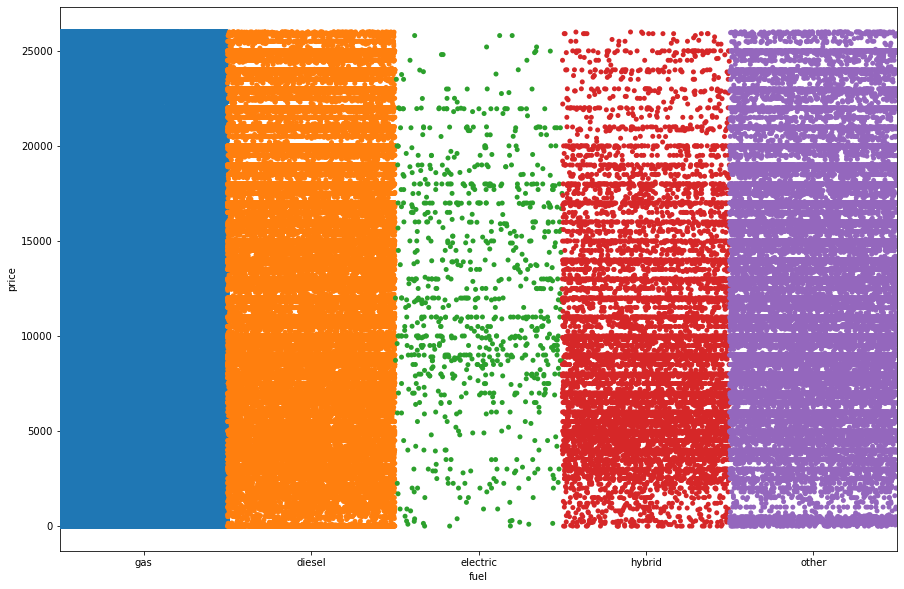

In [36]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='fuel', y='price', jitter=.5)
plt.show()

In [44]:
df = df.astype({"price":float})

In [57]:
df.head(5)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,...,manufacturer_code,size_code,type_code,drive_code,transmission_code,paint_color_code,fuel_code,condition_code,title_status_code,make_code
0,11900.0,2010.0,dodge,challenger se,excellent,6.0,gas,43600.0,clean,automatic,...,10,2,3,2,0,8,2,0,0,11135
2,17550.0,2008.0,ford,f150,good,8.0,gas,50000.0,clean,automatic,...,13,2,7,2,0,6,2,2,0,19116
3,2800.0,2004.0,ford,taurus,fair,6.0,gas,168591.0,clean,automatic,...,13,1,8,1,0,5,2,1,0,40671
5,9900.0,2007.0,gmc,yukon,good,8.0,gas,169000.0,clean,automatic,...,14,2,7,0,0,6,2,2,0,45534
9,12995.0,2003.0,ford,excursion,fair,10.0,gas,236000.0,clean,automatic,...,13,2,0,0,0,1,2,1,0,17959


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190865 entries, 0 to 1723064
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   price              1190865 non-null  float64
 1   year               1190865 non-null  float64
 2   manufacturer       1190865 non-null  object 
 3   make               1190865 non-null  object 
 4   condition          1190865 non-null  object 
 5   cylinders          1190865 non-null  float64
 6   fuel               1190865 non-null  object 
 7   odometer           1190865 non-null  float64
 8   title_status       1190865 non-null  object 
 9   transmission       1190865 non-null  object 
 10  drive              1190865 non-null  object 
 11  size               1190865 non-null  object 
 12  type               1190865 non-null  object 
 13  paint_color        1190865 non-null  object 
 14  manufacturer_code  1190865 non-null  int32  
 15  size_code          1190865 non-n

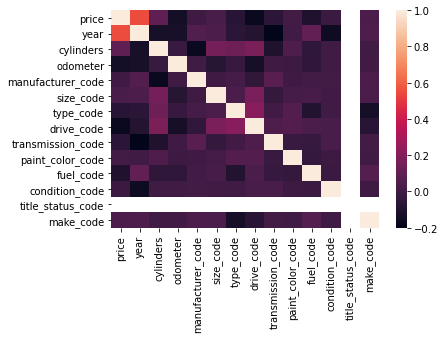

In [64]:
sns.heatmap(df.corr())

In [56]:
df.corr()

,price,year,cylinders,odometer,manufacturer_code,size_code,type_code,drive_code,transmission_code,paint_color_code,fuel_code,condition_code,title_status_code,make_code
price,1.000000,0.554516,0.098008,-0.136058,-0.002908,0.032087,-0.072084,-0.168674,-0.060243,0.010952,-0.097855,-0.013968,NaN,0.041757
year,0.554516,1.000000,-0.121880,-0.124705,0.055360,0.042221,-0.062257,-0.083755,-0.200257,0.001489,0.100185,-0.153468,NaN,0.046554
cylinders,0.098008,-0.121880,1.000000,-0.021154,-0.170702,0.160333,0.135065,0.177182,-0.099044,0.046125,-0.054125,0.005102,NaN,0.004907
odometer,-0.136058,-0.124705,-0.021154,1.000000,0.003662,-0.076343,-0.026161,-0.128411,-0.002381,-0.003744,-0.048544,0.004207,NaN,0.007975
manufacturer_code,-0.002908,0.055360,-0.170702,0.003662,1.000000,-0.001330,0.016443,-0.041505,0.076369,-0.003268,0.010900,0.012769,NaN,0.042552
size_code,0.032087,0.042221,0.160333,-0.076343,-0.001330,1.000000,0.036961,0.171421,-0.034250,0.019162,0.029074,0.008850,NaN,0.035452
type_code,-0.072084,-0.062257,0.135065,-0.026161,0.016443,0.036961,1.000000,0.212295,0.010316,0.061685,-0.089101,0.004767,NaN,-0.125518
drive_code,-0.168674,-0.083755,0.177182,-0.128411,-0.041505,0.171421,0.212295,1.000000,0.044634,0.060682,0.035355,0.030280,NaN,-0.072851
transmission_code,-0.060243,-0.200257,-0.099044,-0.002381,0.076369,-0.034250,0.010316,0.044634,1.000000,-0.018625,-0.026299,0.034064,NaN,0.012562
paint_color_code,0.010952,0.001489,0.046125,-0.003744,-0.003268,0.019162,0.061685,0.060682,-0.018625,1.000000,-0.034223,-0.005103,NaN,0.003485


In [68]:
df.isna().sum()

price                0
year                 0
manufacturer         0
make                 0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size                 0
type                 0
paint_color          0
manufacturer_code    0
size_code            0
type_code            0
drive_code           0
transmission_code    0
paint_color_code     0
fuel_code            0
condition_code       0
title_status_code    0
make_code            0
dtype: int64